## 삼성전자 주식 가격과 원자재(옥수수) 가격 비교 분석

데이터 출처:
* samsung electronics 주가: Naver 금융(financedatareader 패키지를 이용한 수집)
* 미국 옥수수 선물: Investing.com 에서 csv 파일 다운로드

분석 내용:
1. 삼성전자 주가와 원자재 가격 비교 그래프
    - Candle chart로 그려보기
    - 스케일링
2. 상관계수 계산(전체적으로 무의미한 경우 구간별로 분석해보기)
3. 변동폭이 큰 구간에 이슈 찾아보기

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터가 있는 폴더명
folder = "data"

In [3]:
def data_info(df):
    print(f'shape: {df.shape}')
    print(f'dtypes: {df.dtypes}')
    display(df.head())

In [4]:
stock = pd.read_csv(folder+"/SSE2015-01-01_2020-06-30.csv")
corn = pd.read_csv(folder+"/corn2015_2020.csv")

data_info(stock)
data_info(corn)

shape: (1350, 7)
dtypes: Date       object
Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
dtype: object


,Date,Open,High,Low,Close,Volume,Change
0,2015-01-02,26799,26799,26540,26600,175499,0.002261
1,2015-01-05,26720,26720,26260,26660,202790,0.002256
2,2015-01-06,26300,26340,25760,25900,304710,-0.028507
3,2015-01-07,25880,26220,25640,26140,286455,0.009266
4,2015-01-08,26780,26780,26199,26280,289552,0.005356


shape: (1439, 7)
dtypes: 날짜       object
종가      float64
오픈      float64
고가      float64
저가      float64
거래량      object
변동 %     object
dtype: object


,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020년 06월 30일,338.50,325.25,342.00,323.75,21.41K,3.75%
1,2020년 06월 29일,326.25,316.75,326.50,316.00,150.22K,3.24%
2,2020년 06월 28일,316.00,316.50,316.50,316.00,-,-0.32%
3,2020년 06월 26일,317.00,317.00,319.75,313.50,216.58K,-0.08%
4,2020년 06월 25일,317.25,323.50,324.25,315.00,194.69K,-2.16%


In [5]:
# corn 데이터프레임 컬럼명 변경
corn.columns = ['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Change']

In [6]:
# Date 컬럼 형식 변환
def process_Date(df):
    
    regex_pat = re.compile(r'[가-힣] ')
    df['Date'] = df.Date.replace(regex_pat, '-')
    regex_pat = re.compile(r'[가-힣]')
    df['Date'] = df.Date.replace(regex_pat, '')
    
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    return df

In [7]:
stock = process_Date(stock)
corn = process_Date(corn)

data_info(stock)
data_info(corn)

shape: (1350, 7)
dtypes: Date      datetime64[ns]
Open               int64
High               int64
Low                int64
Close              int64
Volume             int64
Change           float64
dtype: object


,Date,Open,High,Low,Close,Volume,Change
0,2015-01-02,26799,26799,26540,26600,175499,0.002261
1,2015-01-05,26720,26720,26260,26660,202790,0.002256
2,2015-01-06,26300,26340,25760,25900,304710,-0.028507
3,2015-01-07,25880,26220,25640,26140,286455,0.009266
4,2015-01-08,26780,26780,26199,26280,289552,0.005356


shape: (1439, 7)
dtypes: Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Volume            object
Change            object
dtype: object


,Date,Close,Open,High,Low,Volume,Change
0,2020-06-30,338.50,325.25,342.00,323.75,21.41K,3.75%
1,2020-06-29,326.25,316.75,326.50,316.00,150.22K,3.24%
2,2020-06-28,316.00,316.50,316.50,316.00,-,-0.32%
3,2020-06-26,317.00,317.00,319.75,313.50,216.58K,-0.08%
4,2020-06-25,317.25,323.50,324.25,315.00,194.69K,-2.16%


In [8]:
# Volumne 컬럼 형식 변환
def process_Volume(volume):
    if volume == '-':
        return 0
    
    scale = volume[-1]
    val = float(volume[:-1])
    
    if scale == 'K':
        val = val*1000
    elif scale == 'M':
        val = val*1e6
    elif scale == 'B':
        val = val*1e9
        
    return val

In [9]:
corn['Volume'] = corn['Volume'].apply(process_Volume)
corn.head()

,Date,Close,Open,High,Low,Volume,Change
0,2020-06-30,338.50,325.25,342.00,323.75,21410.0,3.75%
1,2020-06-29,326.25,316.75,326.50,316.00,150220.0,3.24%
2,2020-06-28,316.00,316.50,316.50,316.00,0.0,-0.32%
3,2020-06-26,317.00,317.00,319.75,313.50,216580.0,-0.08%
4,2020-06-25,317.25,323.50,324.25,315.00,194690.0,-2.16%


In [10]:
# Date 기준 오름차순으로 정렬
corn.sort_values(by='Date', inplace=True)
corn.head()

,Date,Close,Open,High,Low,Volume,Change
1438,2015-01-02,395.75,396.25,398.50,391.50,88770.0,-0.31%
1437,2015-01-05,406.00,395.75,406.75,394.50,140390.0,2.59%
1436,2015-01-06,405.00,405.50,409.50,402.25,138310.0,-0.25%
1435,2015-01-07,396.25,404.75,407.25,395.75,131690.0,-2.16%
1434,2015-01-08,394.25,396.50,398.75,392.75,118970.0,-0.50%


## 1. 삼성 주가와 옥수수 선물 가격 변화 비교

In [11]:
# mplfinance plot을 그리기 위해 Date 컬럼을 index로 설정
setidx_stock = stock.set_index('Date')
setidx_corn = corn.set_index('Date')

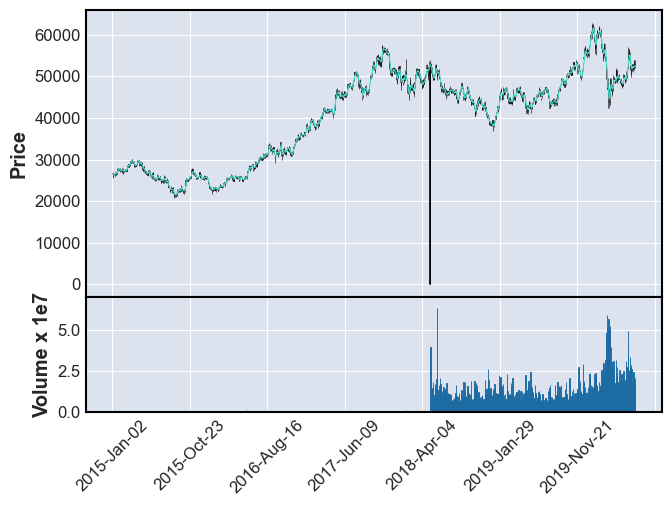

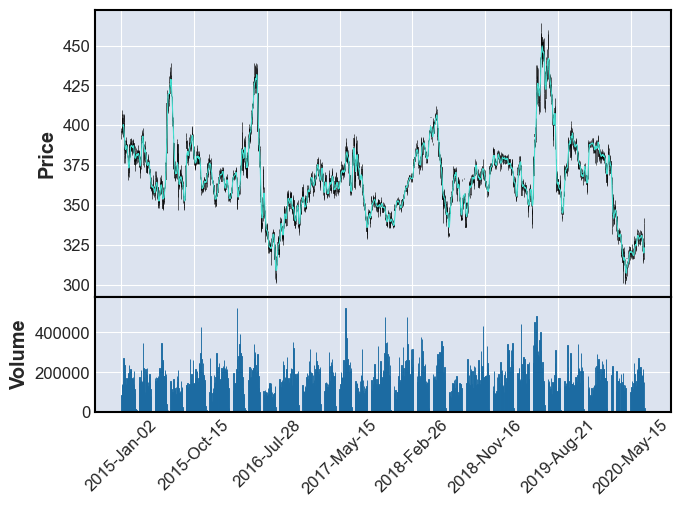

In [12]:
mpf.plot(setidx_stock,
         type='candle',
         mav=5,
         volume=True)

mpf.plot(setidx_corn,
         type='candle',
         mav=5,
         volume=True)

In [13]:
setidx_stock[setidx_stock['Low'] <= 0]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-30,0,0,0,53000,0,0.0
2018-05-02,0,0,0,53000,0,0.0
2018-05-03,0,0,0,53000,0,0.0


-> 위 3일은 주식 분할 이슈로 거래가 정지된 기간입니다. 따라서 해당 rows는 drop합니다.
- 참고: http://vip.mk.co.kr/news/view/19/28/640222.html

In [14]:
index = setidx_stock[setidx_stock['Low'] <= 0].index
setidx_stock.drop(index, inplace=True)
data_info(setidx_stock)

shape: (1347, 6)
dtypes: Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
dtype: object


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261
2015-01-05,26720,26720,26260,26660,202790,0.002256
2015-01-06,26300,26340,25760,25900,304710,-0.028507
2015-01-07,25880,26220,25640,26140,286455,0.009266
2015-01-08,26780,26780,26199,26280,289552,0.005356


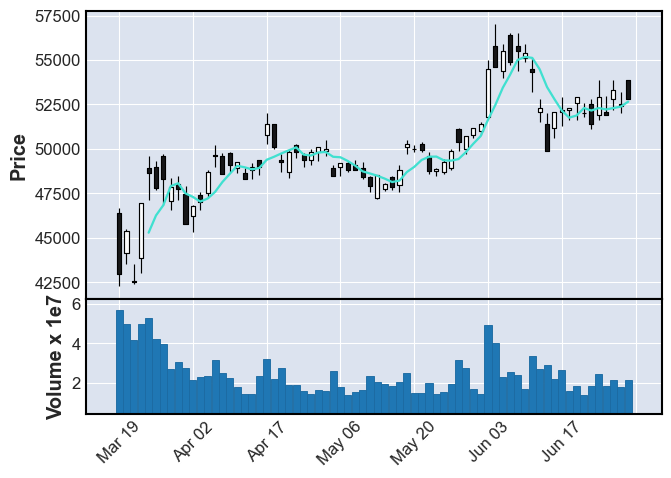

In [15]:
# candle chart 특정 구간 자세히 보기
mpf.plot(setidx_stock.iloc[-70:],
         type='candle',
         mav=5,
         volume=True)

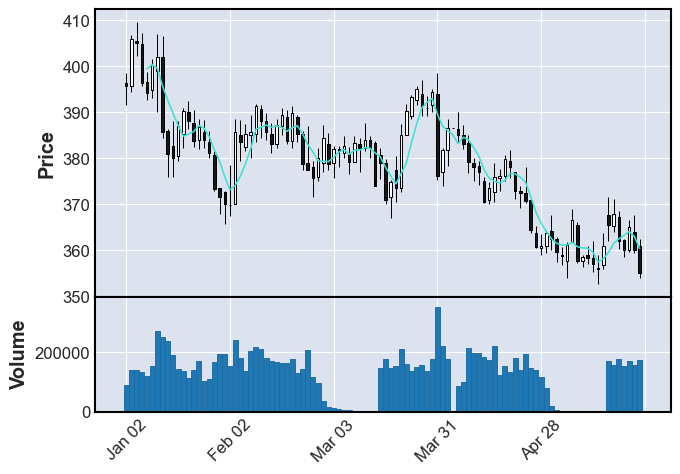

In [16]:
mpf.plot(setidx_corn.iloc[:100],
         type='candle',
         mav=5,
         volume=True)

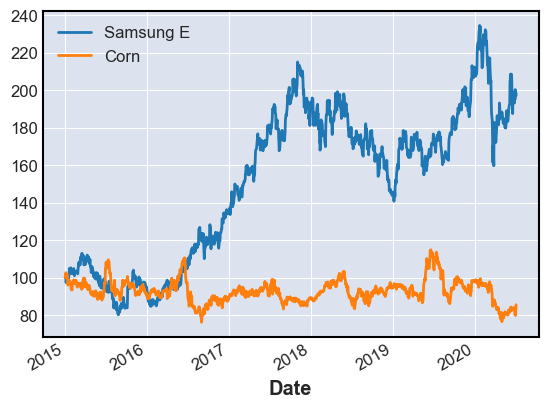

In [17]:
# 정규화를 통한 그래프 비교(전체기간)

scaling_stock = setidx_stock['Close']/setidx_stock['Close'].iloc[0] *100
scaling_corn = setidx_corn['Close']/setidx_corn['Close'].iloc[0] *100

scaling_stock.plot()
scaling_corn.plot()
plt.legend(['Samsung E', 'Corn'])
plt.show()

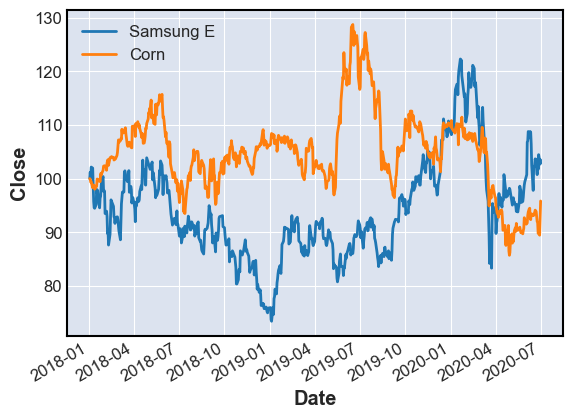

In [18]:
# 정규화를 통한 그래프 비교(2018년 이후)

scaling_stock = setidx_stock[setidx_stock.index.year >= 2018]['Close']/setidx_stock[setidx_stock.index.year >= 2018]['Close'].iloc[0] *100
scaling_corn = setidx_corn[setidx_corn.index.year >= 2018]['Close']/setidx_corn[setidx_corn.index.year >= 2018]['Close'].iloc[0] *100

scaling_stock.plot()
scaling_corn.plot()
plt.ylabel("Close")
plt.legend(['Samsung E', 'Corn'])
plt.show()

## 2. 상관계수 계산

In [19]:
# 삼선전자와 옥수수 선물의 종가와 거래량을 하나의 테이블로 merge합니다.
heatmap_data = pd.merge(stock[['Date','Close', 'Volume']],
                        corn[['Date','Close', 'Volume']],
                        on='Date',
                        how='outer')

data_info(heatmap_data)

shape: (1467, 5)
dtypes: Date        datetime64[ns]
Close_x            float64
Volume_x           float64
Close_y            float64
Volume_y           float64
dtype: object


,Date,Close_x,Volume_x,Close_y,Volume_y
0,2015-01-02,26600.0,175499.0,395.75,88770.0
1,2015-01-05,26660.0,202790.0,406.00,140390.0
2,2015-01-06,25900.0,304710.0,405.00,138310.0
3,2015-01-07,26140.0,286455.0,396.25,131690.0
4,2015-01-08,26280.0,289552.0,394.25,118970.0


In [20]:
heatmap_data.columns = ['Date', 'Close_ss', 'Volume_ss', 'Close_c', 'Volume_c']

### 전체 상관계수

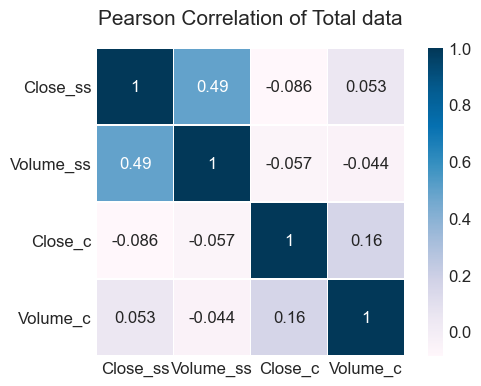

In [21]:
colormap = plt.cm.PuBu
plt.figure(figsize=(6, 4))
plt.title("Pearson Correlation of Total data", y = 1.05, size = 15)
sns.heatmap(heatmap_data[['Close_ss', 'Volume_ss', 'Close_c', 'Volume_c']].astype(float).corr(),
            linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap,
            linecolor = "white", annot = True,
            annot_kws = {"size" : 12})

### 코로나 사태 전/후 비교
* 코로나 사태 기준일: 2020-01-01 부터

In [22]:
covid = heatmap_data[heatmap_data['Date'].dt.year == 2020]
data_info(covid)

shape: (146, 5)
dtypes: Date         datetime64[ns]
Close_ss            float64
Volume_ss           float64
Close_c             float64
Volume_c            float64
dtype: object


,Date,Close_ss,Volume_ss,Close_c,Volume_c
1227,2020-01-02,55200.0,12993228.0,391.50,103990.0
1228,2020-01-03,55500.0,15422255.0,386.50,125930.0
1229,2020-01-06,55500.0,10278951.0,384.75,112130.0
1230,2020-01-07,55800.0,10009778.0,384.50,93540.0
1231,2020-01-08,56800.0,23501171.0,384.25,135520.0


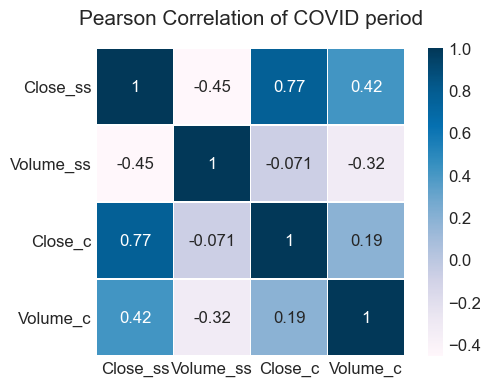

In [23]:
colormap = plt.cm.PuBu
plt.figure(figsize=(6, 4))
plt.title("Pearson Correlation of COVID period", y = 1.05, size = 15)
sns.heatmap(covid[['Close_ss', 'Volume_ss', 'Close_c', 'Volume_c']].astype(float).corr(),
            linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap,
            linecolor = "white", annot = True,
            annot_kws = {"size" : 12})

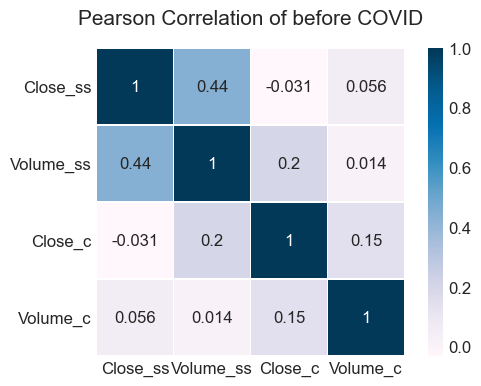

In [24]:
normal = heatmap_data[heatmap_data['Date'].dt.year != 2020]

colormap = plt.cm.PuBu
plt.figure(figsize=(6, 4))
plt.title("Pearson Correlation of before COVID", y = 1.05, size = 15)
sns.heatmap(normal[['Close_ss', 'Volume_ss', 'Close_c', 'Volume_c']].astype(float).corr(),
            linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap,
            linecolor = "white", annot = True,
            annot_kws = {"size" : 12})

## 3. 변동폭이 커진 구간의 이슈 찾기

### 옥수수 선물 가격 급등/급락한 기간

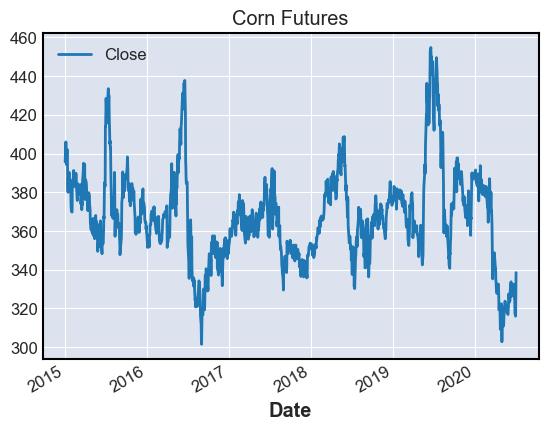

In [25]:
corn.plot(x='Date', y='Close')
plt.title("Corn Futures")
plt.show()

In [26]:
# 연도별로 종가를 내림차순 정렬하여 확인합니다.(고가)
for interest_year in range(2015, 2020):
    print(interest_year)
    display(corn[corn['Date'].dt.year == interest_year].sort_values(by='Close',ascending=False)[:10])

2015


,Date,Close,Open,High,Low,Volume,Change
1305,2015-07-13,433.50,427.00,434.25,424.00,1530.0,1.46%
1302,2015-07-16,430.00,430.25,438.75,428.25,144240.0,0.12%
1303,2015-07-15,429.50,427.00,431.75,421.00,155160.0,1.30%
1311,2015-07-03,428.50,428.50,428.50,428.50,0.0,2.08%
1306,2015-07-10,427.25,420.00,431.00,418.00,1960.0,1.42%
1304,2015-07-14,424.00,433.75,436.25,423.25,710.0,-2.19%
1307,2015-07-09,421.25,416.50,425.00,416.50,5160.0,1.20%
1301,2015-07-17,420.25,428.00,429.50,418.25,108360.0,-2.27%
1312,2015-07-02,419.75,413.00,422.00,409.75,11000.0,1.45%
1310,2015-07-06,418.50,417.75,419.50,408.75,10260.0,-2.33%


2016


,Date,Close,Open,High,Low,Volume,Change
1066,2016-06-17,437.75,425.00,438.25,423.50,179120.0,2.94%
1069,2016-06-14,436.50,429.50,436.75,423.50,236330.0,1.51%
1073,2016-06-08,431.25,427.25,439.25,426.50,342760.0,0.82%
1070,2016-06-13,430.00,427.50,438.00,427.50,304090.0,1.65%
1068,2016-06-15,429.00,435.75,439.00,428.50,186440.0,-1.72%
1074,2016-06-07,427.75,426.25,428.00,422.50,273080.0,0.12%
1075,2016-06-06,427.25,419.75,427.50,419.25,223120.0,2.15%
1072,2016-06-09,426.50,430.25,430.25,423.25,262530.0,-1.10%
1067,2016-06-16,425.25,426.25,429.75,420.50,196400.0,-0.87%
1071,2016-06-10,423.00,426.50,437.00,420.00,291070.0,-0.82%


2017


,Date,Close,Open,High,Low,Volume,Change
799,2017-07-11,392.25,393.25,394.50,387.00,1710.0,0.13%
800,2017-07-10,391.75,387.75,392.25,387.75,1410.0,2.49%
792,2017-07-20,391.00,382.50,393.25,380.50,139460.0,2.22%
820,2017-06-09,387.75,384.25,389.50,380.75,268360.0,0.52%
821,2017-06-08,385.75,385.00,391.75,384.25,398380.0,0.26%
822,2017-06-07,384.75,378.25,387.00,378.25,523850.0,1.99%
815,2017-06-16,384.00,378.75,384.50,377.00,206390.0,1.19%
793,2017-07-19,382.50,376.50,389.00,374.25,139740.0,1.46%
801,2017-07-07,382.25,379.00,386.75,378.25,2870.0,0.53%
803,2017-07-05,381.75,379.50,383.25,374.75,7600.0,0.99%


2018


,Date,Close,Open,High,Low,Volume,Change
571,2018-05-28,408.75,409.00,409.00,408.75,0.0,0.68%
574,2018-05-23,408.50,404.50,409.00,403.00,163380.0,0.93%
572,2018-05-25,406.00,404.00,406.75,403.25,129410.0,0.43%
588,2018-05-06,405.00,405.00,405.00,405.00,0.0,1.57%
575,2018-05-22,404.75,402.25,407.00,401.00,166300.0,0.50%
573,2018-05-24,404.25,408.25,412.25,403.75,236840.0,-1.04%
576,2018-05-21,402.75,405.50,407.50,401.25,181090.0,0.25%
578,2018-05-18,402.50,395.25,403.50,395.00,181910.0,1.83%
581,2018-05-15,402.25,396.25,402.50,396.00,190990.0,3.41%
577,2018-05-20,401.75,401.75,401.75,401.75,0.0,-0.19%


2019


,Date,Close,Open,High,Low,Volume,Change
284,2019-06-17,454.75,458.25,464.25,450.50,279480.0,0.39%
285,2019-06-14,453.00,442.00,457.25,441.75,312810.0,2.49%
281,2019-06-20,450.00,441.50,450.75,436.50,198630.0,2.04%
283,2019-06-18,449.75,455.50,458.00,442.75,221470.0,-1.10%
266,2019-07-12,449.50,447.75,457.00,447.75,270.0,0.39%
267,2019-07-11,447.75,433.25,448.00,433.25,600.0,3.11%
278,2019-06-25,447.50,451.00,453.00,446.50,158430.0,0.17%
279,2019-06-24,446.75,442.25,447.75,440.25,172090.0,1.02%
277,2019-06-26,443.25,447.00,447.25,440.75,158880.0,-0.95%
280,2019-06-21,442.25,452.00,454.00,441.75,251090.0,-1.72%


In [27]:
# 연도별로 종가를 오름차순 정렬하여 확인합니다.(저가)
for interest_year in range(2015, 2021):
    print(interest_year)
    display(corn[corn['Date'].dt.year == interest_year].sort_values(by='Close',ascending=True)[:10])

2015


,Date,Close,Open,High,Low,Volume,Change
1267,2015-09-03,347.75,354.00,354.50,347.25,8520.0,-1.77%
1325,2015-06-15,348.25,353.00,353.25,346.75,261740.0,-1.35%
1338,2015-05-27,349.50,355.00,356.50,348.75,180700.0,-1.55%
1266,2015-09-04,349.50,348.00,351.00,346.75,5790.0,0.50%
1336,2015-05-29,351.50,353.25,357.00,350.00,141540.0,-0.57%
1335,2015-06-01,352.25,350.50,354.25,348.25,140810.0,0.21%
1326,2015-06-12,353.00,356.00,356.75,352.25,223040.0,-0.98%
1321,2015-06-19,353.25,357.75,358.00,351.75,164910.0,-1.33%
1337,2015-05-28,353.50,349.50,355.00,348.25,163610.0,1.14%
1324,2015-06-16,354.00,349.00,354.25,347.50,253140.0,1.65%


2016


,Date,Close,Open,High,Low,Volume,Change
1014,2016-08-31,301.50,304.00,307.25,301.00,25260.0,-0.82%
1015,2016-08-30,304.00,311.75,312.75,303.50,132220.0,-2.49%
1013,2016-09-01,311.00,302.00,311.50,301.75,11500.0,3.15%
1016,2016-08-29,311.75,316.25,318.75,310.75,128340.0,-1.42%
1017,2016-08-26,316.25,323.50,325.25,315.75,98580.0,-2.24%
1012,2016-09-02,316.50,311.00,317.75,311.00,3410.0,1.77%
1011,2016-09-06,316.75,316.00,317.75,312.25,2460.0,0.08%
1006,2016-09-13,319.25,329.25,330.00,320.25,710.0,-3.04%
1033,2016-08-04,320.75,325.00,326.75,320.50,83080.0,-1.31%
1010,2016-09-07,321.00,316.25,322.00,315.00,2570.0,1.34%


2017


,Date,Close,Open,High,Low,Volume,Change
763,2017-08-30,329.50,333.00,334.00,329.00,159950.0,-1.20%
764,2017-08-29,333.50,335.50,336.00,332.00,130110.0,-0.74%
691,2017-12-12,335.75,336.50,340.75,335.25,850.0,-0.22%
765,2017-08-28,336.00,338.75,340.25,335.50,113740.0,-0.81%
689,2017-12-14,336.25,337.00,338.00,336.25,150.0,-0.15%
701,2017-11-28,336.25,339.00,339.50,335.75,183160.0,-0.74%
708,2017-11-16,336.50,338.25,339.00,336.25,186660.0,-0.52%
692,2017-12-11,336.50,340.00,340.00,336.00,1060.0,-1.03%
690,2017-12-13,336.75,337.25,337.50,336.50,360.0,0.30%
710,2017-11-14,337.50,342.00,342.25,337.25,220980.0,-1.39%


2018


,Date,Close,Open,High,Low,Volume,Change
538,2018-07-13,330.25,332.25,332.50,332.25,270.0,-1.86%
540,2018-07-11,331.25,336.00,337.00,331.50,1530.0,-2.50%
492,2018-09-13,336.25,344.50,344.50,337.00,130.0,-1.54%
539,2018-07-12,336.50,332.25,340.75,329.75,530.0,1.58%
491,2018-09-14,337.00,338.50,338.75,337.50,60.0,0.22%
546,2018-07-02,337.50,352.25,352.25,337.00,7670.0,-3.64%
541,2018-07-10,339.75,344.25,344.75,336.25,2740.0,-1.74%
505,2018-08-28,341.00,345.75,347.75,340.75,143200.0,-1.66%
503,2018-08-30,341.00,341.50,344.00,340.50,122610.0,-0.07%
504,2018-08-29,341.25,341.00,344.00,340.25,113200.0,0.07%


2019


,Date,Close,Open,High,Low,Volume,Change
226,2019-09-09,340.75,343.25,343.25,340.00,940.0,-0.51%
227,2019-09-06,342.50,347.50,348.25,341.50,1360.0,-1.15%
309,2019-05-10,342.50,346.50,346.50,338.25,310.0,-0.58%
310,2019-05-09,344.50,350.00,350.00,344.00,660.0,-3.03%
229,2019-09-04,346.00,350.50,351.00,344.50,3850.0,-1.07%
228,2019-09-05,346.50,346.50,349.75,346.50,1810.0,0.14%
321,2019-04-24,346.75,351.00,352.50,345.50,241390.0,-1.28%
308,2019-05-13,347.50,335.50,348.25,335.50,290.0,1.46%
320,2019-04-25,347.50,346.00,351.00,342.25,236880.0,0.22%
224,2019-09-11,348.25,349.75,349.75,344.75,330.0,-0.07%


2020


,Date,Close,Open,High,Low,Volume,Change
53,2020-04-28,302.75,305.00,308.50,301.25,138100.0,-0.90%
52,2020-04-29,304.50,302.75,308.75,300.25,121800.0,0.58%
54,2020-04-27,305.50,315.00,315.75,304.25,108690.0,-5.24%
59,2020-04-21,309.25,314.25,316.25,301.00,197930.0,-1.59%
48,2020-05-04,310.75,309.50,310.00,305.50,2620.0,-1.93%
51,2020-04-30,311.50,305.25,313.00,303.50,11090.0,2.30%
50,2020-05-01,311.50,311.00,311.50,308.00,3510.0,0.00%
46,2020-05-06,311.75,315.00,315.00,311.00,520.0,-0.40%
47,2020-05-05,313.00,310.50,314.75,310.50,870.0,0.72%
60,2020-04-20,314.25,322.50,323.25,313.50,150680.0,-2.52%


### 뉴스 검색 기간

고가
* 2015: 7/1~7/20
    * 엘니뇨, 이상 기후 여파 곡물가격 급등세
        * http://www.newspim.com/news/view/20150713000075
    * 재고량 감소
        * http://www.econovill.com/news/articleView.html?idxno=252288

* 2016: 6/1~6/20
    * 건조한 날씨 예측에 대두, 옥수수 반등
        * https://www.agriculture.com/news/crops/3-big-things-today-june-17

* 2019: 6/10~7/15
    * 기상악화로 수확량 감소 전망
        * https://www.mk.co.kr/news/stock/view/2019/06/424281/

저가
* 2016: 8/20~9/10
    * 옥수수, 대두, 밀 선물은 영국의 유권자들이 유럽 연합을 탈퇴하기로 결정한 후 하룻밤 사이에 모두 폭락하여 세계 시장에 큰 피해를 입혔습니다.
        * https://www.agriculture.com/news/crops/3-big-things-today-june-24
    * 미국 옥수수 생산량이 급증
        * http://www.econovill.com/news/articleView.html?idxno=297913

* 2020: 4/20~5/10
    * 에탄올을 생산하기위한 옥수수 수요에 대한 전망이 좋지 않고 세계 경제 상황이 암울하기 때문
        * https://www.reuters.com/article/global-grains-idUSL2N2C32XB